<a href="https://colab.research.google.com/github/dscott-tantustech/ab_test_guide_in_python/blob/master/Sprint_27_V4__SUBTOPIC_Text_Ingest_pdf_20240523_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MODULE 0: File Uploads
# An interactive menu will pop up to choose the files.
# 2 Files to upload:
#                   1.'Reference_Workbook_CY_Provisions_CY2024_DRS_Topics_Subtopics.xlsx'
#                   2.'CMS-2023-0121-0001_content_1920pp.pdf'

from google.colab import files
uploaded = files.upload()



Saving Reference_Workbook_CY_Provisions_CY2024_DRS_Topics_Subtopics.xlsx to Reference_Workbook_CY_Provisions_CY2024_DRS_Topics_Subtopics.xlsx
Saving CMS-2023-0121-0001_content_1920pp.pdf to CMS-2023-0121-0001_content_1920pp.pdf


In [ ]:
#MODULE 1: Create data frame from the attached Topic/Subtopic file
import pandas as pd
Topic_SubTopic_df = pd.read_excel('Reference_Workbook_CY_Provisions_CY2024_DRS_Topics_Subtopics.xlsx')
#sort so that Topics come directly before each of their respective subtopics
#Topic_SubTopic_df = Topic_SubTopic_df.sort_values(by=['Start_Page', 'InsightsAI_Topic'], ascending=[True, True])
Topic_SubTopic_df = Topic_SubTopic_df.sort_values(by=['Sort_seq'], ascending=True)

#Topic Only Data Frame
Topic_only_df = Topic_SubTopic_df[Topic_SubTopic_df['InsightsAI_Topic'].notnull()]
Topic_only_df.drop(columns=['Topic','Subtopic', 'Topic-Subtopic','InsightsAI_Subtopic','InsightsAI_TopicSubtopic'], inplace=True)

# *SUB-* topic Only data frame
Subtopic_only_df = Topic_SubTopic_df[Topic_SubTopic_df['InsightsAI_Subtopic'].notnull()]
Subtopic_only_df = Subtopic_only_df[Subtopic_only_df['InsightsAI_Topic'].isnull()]
Subtopic_only_df = Subtopic_only_df[Subtopic_only_df['InsightsAI_Subtopic']!=" "]

Subtopic_only_df.drop(columns=['Topic','Subtopic', 'Topic-Subtopic','InsightsAI_TopicSubtopic'], inplace=True)

Topic_only_df
#Subtopic_only_df

<ipython-input-4-741874cf5b43>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Topic_only_df.drop(columns=['Topic','Subtopic', 'Topic-Subtopic','InsightsAI_Subtopic','InsightsAI_TopicSubtopic'], inplace=True)


,Start_Page,End Page,InsightsAI_Topic,L_and_M_Keywords,Sort_seq,L_and_M_Summary,Pages
0,12,48,2B_Determination of Practice Expense RVUs,1848(c)(1)(B)\nIndirect Cost PE RVU\nIndirect ...,1,Background: Practice Expense (PE) is the porti...,36
4,49,67,2C_Potentially Misvalued Services,Potentially misvalued codes\npotentially misva...,5,Background: Section 1848(c)(2)(B) of the Act d...,18
5,68,129,2D_Telehealth Services,Category 1\nCategory 2\nCategory 3\ntemporary\...,6,"Background: In the 2003 PFS final rule, a regu...",61
19,130,239,2E_Valuation of Specific Codes,,20,NaN,109
48,240,256,2F_E&M Visits,Evaluation and Management (E/M) Visits\nE/M vi...,49,"Background: Over the past several years, CMS h...",16
51,257,260,2G_Geographic Practice Cost Indices,Geographic practice cost indices\nGPCIs\nWork ...,52,NaN,3
54,261,264,2H_Payment for Skin Substitutes,Skin substitutes\nSynthetic skin,55,"Background: In the CY 2023 PFS proposed rule, ...",3
57,265,276,"2I_Supervision of OP Therapy Svcs, KX Modifier...",,58,N/A section immediately starts with 2I1a,11
63,277,307,2J_Advancing Access to Behavioral Health Services,,64,N/A section immediately starts with 2J1,30
72,308,350,2K_Medicare Parts A and B Payment for Dental S...,,73,NaN,42


In [ ]:
# MODULE 2: Convert Proposed Rules PDF to Text
!pip install PyPDF2
import PyPDF2

def convert_pdf_to_txt(file):
    pdf_file = open(file, 'rb')
    read_pdf = PyPDF2.PdfReader(pdf_file)
    number_of_pages = len(read_pdf.pages)

    segments = []
    for page_number in range(number_of_pages):
        page = read_pdf.pages[page_number]
        page_content = page.extract_text()
        segments.append(page_content)

    return segments

segments = convert_pdf_to_txt('CMS-2023-0121-0001_content_1920pp.pdf')
print(type(segments))  # Output: <class 'list'>


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.9 MB/s eta 0:00:00
<class 'list'>


In [ ]:
#MODULE 3
#installations for the model below
!pip install transformers
!pip install nltk
!pip install openai
!pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:00


In [ ]:
#MODULE 4: Separate Document into Sentences with Page Information and then add the Topic
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

sentences_with_pages = []
page_number = 1

for page_content in segments:
    page_sentences = sent_tokenize(page_content)
    for sentence in page_sentences:
        sentences_with_pages.append(f"from p. {page_number}: [{sentence}]")
    page_number += 1

print(sentences_with_pages[50:55])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['from p. 6: [Amy Gruber, (410) 786-1542, or AmbulanceDataCollection@cms.hhs.gov, for issues \nrelated to the Ambulance Fee Schedule (AFS) and the Medicare Ground Ambulance Data \nCollection System.]', 'from p. 6: [Mary Rossi-Coajou (410) 786-6051, for issues related to hospice Conditions of \nParticipation.]', 'from p. 6: [Cameron Ingram (410) 409-8023 for issues related to Histopathology, Cytology, and \nClinical Cytogenetics Regulations under CLIA of 1988.]', 'from p. 6: [Meg Barry (410)786-1536, for issues related to the Basic Health Program (BHP) \nprovisions.]', 'from p. 6: [Renee O’Neill, (410) 786-8821, or Sophia Sugumar, (410) 786-1648, for inquiries related \nto Merit-based Incentive Payment System (MIPS).]']


In [ ]:
#Module 5b: Add Topics to segments
import pandas as pd
from nltk.tokenize import sent_tokenize
#!pip install transformers --upgrade

def num_tokens_from_string(string: str, encoding_name: str='gpt-4') -> int:
    # Simulating encoding length function, adjust as needed
    return len(string)

def merge_with_topic(segments, Topic_only_df):
  """
  Merges segments with topics based on page numbers and adds a 'Topic' column.

  Args:
      segments (list): List of page content strings.
      Topic_only_df (pd.DataFrame): Dataframe with topics, start pages, and end pages.

  Returns:
      pd.DataFrame: Dataframe with segments, page numbers, and a 'Topic' column.
  """

  # Initialize variables
  page_number = 1
  all_sentences = []

  for page_content in segments:
    # Tokenize sentences
    page_sentences = sent_tokenize(page_content)
    for sentence in page_sentences:
      # Create a dictionary for each sentence with page and topic (initially None)
      all_sentences.append({
          'text': f"from p. {page_number}: [{sentence}]",
          'page': page_number
      })
    page_number += 1



  # Convert list of dictionaries to a dataframe
  df_sentences = pd.DataFrame(all_sentences)

  # Merge Dataframes
  merged_df = df_sentences.merge(Topic_only_df, how='left', left_on='page', right_on='Start_Page')

  # Forward fill 'Topic' and handle sentences exceeding last topic's end page
  merged_df['InsightsAI_Topic'] = merged_df['InsightsAI_Topic'].fillna(method='ffill')
  merged_df['Sort_seq'] = merged_df['Sort_seq'].fillna(method='ffill')
  merged_df.loc[merged_df['page'] > Topic_only_df['End Page'].max(), 'InsightsAI_Topic'] = 'NA'

  return merged_df

merged_df = merge_with_topic(segments, Topic_only_df)

merged_df = merged_df[merged_df['InsightsAI_Topic'].notnull()]
#Remove stubborn last row:
merged_df = merged_df[merged_df['InsightsAI_Topic']!="NA"]



### THIS OPTIONAL BLOCK OF CODE CAN ADD THE TOPIC TO THE ACTUAL TEXT BEING CONSIDERED.
merged_df['text'] = 'Topic: ' + merged_df['InsightsAI_Topic'].astype(str) + ': [' + merged_df['text'] + ']'
merged_df = merged_df.loc[:, ['text', 'page','InsightsAI_Topic','Sort_seq']]

###
#merged_df["Topic_and_Text"]=merged_df['InsightsAI_Topic']+merged_df['text']
#Remove the single (And long) Non-Contiguous section of text pages
merged_df = merged_df[~merged_df['page'].isin([i for i in range(869, 1175)])]

#len(merged_df.text)
merged_df.head()

# Aggregate text for each Topic into a single entry
#merged_df_Topic_text_combined = merged_df.groupby('InsightsAI_Topic')['text'].agg(lambda x: ' '.join(x)).reset_index()

merged_df_Topic_text_combined = merged_df.groupby(['InsightsAI_Topic', 'Sort_seq'])['text'].agg(lambda x: ' '.join(x)).reset_index()
merged_df_Topic_text_combined

,InsightsAI_Topic,Sort_seq,text
0,2B_Determination of Practice Expense RVUs,1.0,Topic: 2B_Determination of Practice Expense RV...
1,2C_Potentially Misvalued Services,5.0,Topic: 2C_Potentially Misvalued Services: [fro...
2,2D_Telehealth Services,6.0,Topic: 2D_Telehealth Services: [from p. 68: [D...
3,2E_Valuation of Specific Codes,20.0,Topic: 2E_Valuation of Specific Codes: [from p...
4,2F_E&M Visits,49.0,Topic: 2F_E&M Visits: [from p. 240: [F. Evalu...
5,2G_Geographic Practice Cost Indices,52.0,Topic: 2G_Geographic Practice Cost Indices: [f...
6,2H_Payment for Skin Substitutes,55.0,Topic: 2H_Payment for Skin Substitutes: [from ...
7,"2I_Supervision of OP Therapy Svcs, KX Modifier...",58.0,"Topic: 2I_Supervision of OP Therapy Svcs, KX M..."
8,2J_Advancing Access to Behavioral Health Services,64.0,Topic: 2J_Advancing Access to Behavioral Healt...
9,2K_Medicare Parts A and B Payment for Dental S...,73.0,Topic: 2K_Medicare Parts A and B Payment for D...


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.01M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/917k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.23M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/98.0 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Token indices sequence length is longer than the specified maximum sequence length for this model (28149 > 8192). Running this sequence through the model will result in indexing errors


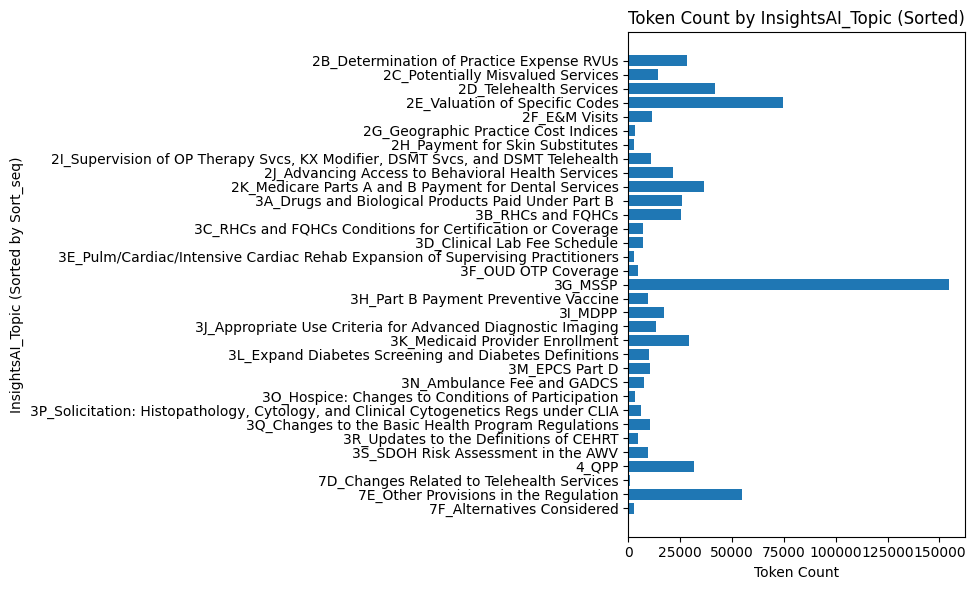

In [ ]:
#OPTIONAL ADDITION TO PRIOR MODULE:
#Count tokens for later summarization task (gpt4-turbo takes 128k tokens)
from transformers import GPT2TokenizerFast
tokenizer = GPT2TokenizerFast.from_pretrained('Xenova/gpt-4')
import matplotlib.pyplot as plt  # Import for plotting

def num_tokens_from_string(text: str) -> int:
    # Tokenize the text using the GPT-4 tokenizer
    tokens = tokenizer.tokenize(text)
    return len(tokens)

# Count tokens for later summarization task
min_obs_show=6700    # limit for gpt4 is 8192, for gpt4-turbo and gpt4o is 128000
'''
for index, text in enumerate(merged_df_Topic_text_combined['text'], start=1):
    token_count = num_tokens_from_string(text)
    if token_count >= min_obs_show:  # Add a condition to check for token count
        print(f"Row {index}: {token_count} tokens")
'''
# Create a new DataFrame to store token counts
tokens_by_topic_df = merged_df_Topic_text_combined.copy()  # Copy existing data
tokens_by_topic_df['token_count'] = None  # Add new column for token count

for index, row in tokens_by_topic_df.iterrows():
  text = row['text']  # Access text from current row
  token_count = num_tokens_from_string(text)
  # Update the new `token_count` column in the DataFrame
  tokens_by_topic_df.at[index, 'token_count'] = token_count

if token_count >= min_obs_show:
    print(f"Row {index}: {token_count} tokens")

# Prepare data for the plot
sorted_topics = tokens_by_topic_df.sort_values(by='Sort_seq')
topics = sorted_topics['InsightsAI_Topic'].tolist()
token_counts = sorted_topics['token_count'].tolist()

# Create the plot with horizontal bars
plt.figure(figsize=(10, 6))  # Set plot size
plt.barh(topics, token_counts)  # Use `barh` for horizontal bars
plt.xlabel('Token Count')
plt.ylabel('InsightsAI_Topic (Sorted by Sort_seq)')
plt.title('Token Count by InsightsAI_Topic (Sorted)')
plt.gca().invert_yaxis()  # Invert y-axis to display topics from top to bottom
plt.tight_layout()  # Adjust spacing for readability
plt.show()

In [ ]:
tokens_by_topic_df

,InsightsAI_Topic,Sort_seq,text,token_count
0,2B_Determination of Practice Expense RVUs,1.0,Topic: 2B_Determination of Practice Expense RV...,28149
1,2C_Potentially Misvalued Services,5.0,Topic: 2C_Potentially Misvalued Services: [fro...,14546
2,2D_Telehealth Services,6.0,Topic: 2D_Telehealth Services: [from p. 68: [D...,41814
3,2E_Valuation of Specific Codes,20.0,Topic: 2E_Valuation of Specific Codes: [from p...,74752
4,2F_E&M Visits,49.0,Topic: 2F_E&M Visits: [from p. 240: [F. Evalu...,11539
5,2G_Geographic Practice Cost Indices,52.0,Topic: 2G_Geographic Practice Cost Indices: [f...,3096
6,2H_Payment for Skin Substitutes,55.0,Topic: 2H_Payment for Skin Substitutes: [from ...,2687
7,"2I_Supervision of OP Therapy Svcs, KX Modifier...",58.0,"Topic: 2I_Supervision of OP Therapy Svcs, KX M...",10856
8,2J_Advancing Access to Behavioral Health Services,64.0,Topic: 2J_Advancing Access to Behavioral Healt...,21798
9,2K_Medicare Parts A and B Payment for Dental S...,73.0,Topic: 2K_Medicare Parts A and B Payment for D...,36485


In [ ]:
# Module 5c - MERGE SUBTOPICS and SENTENCES
# Import necessary libraries
import pandas as pd
from nltk.tokenize import sent_tokenize

def merge_with_Subtopic(segments, Subtopic_only_df):
    """
    Merges segments with topics based on page numbers and adds a 'Topic' column.

    Args:
        segments (list): List of page content strings.
        Subtopic_only_df (pd.DataFrame): Dataframe with subtopics, start pages, and end pages.

    Returns:
        pd.DataFrame: Dataframe with segments, page numbers, and a 'Subtopic' column.
    """
    # Initialize variables
    page_number = 1
    all_sentences = []

    for page_content in segments:
        # Tokenize sentences
        page_sentences = sent_tokenize(page_content)
        for sentence in page_sentences:
            # Create a dictionary for each sentence with page and topic (initially None),
            # and save it in the list called 'all_sentences'
            all_sentences.append({
                'text': f"from p. {page_number}: [{sentence}]",
                'page': page_number
            })
        page_number += 1

    # Convert list of dictionaries to a dataframe
    df_sentences = pd.DataFrame(all_sentences)

    # Initialize lists to store results
    text_list = []
    subtopic_list = []
    seq_list = []
    page_list = []

    # Iterate through each sentence and assign subtopics
    for _, row in df_sentences.iterrows():
        matched_subtopics = Subtopic_only_df[(Subtopic_only_df['Start_Page'] <= row['page']) &
                                             (Subtopic_only_df['End Page']+1 >= row['page'])]

        for _, subtopic_row in matched_subtopics.iterrows():
            text_list.append(row['text'])
            subtopic_list.append(subtopic_row['InsightsAI_Subtopic'])
            seq_list.append(subtopic_row['Sort_seq'])
            page_list.append(row['page'])  # Keep page number for filtering

    # Create final DataFrame
    merged_df = pd.DataFrame({
        'text': text_list,
        'InsightsAI_Subtopic': subtopic_list,
        'Sort_seq': seq_list,
        'page': page_list  # Include page numbers for later filtering if necessary
    })

    return merged_df

# Processing the segments and subtopics
merged_df = merge_with_Subtopic(segments, Subtopic_only_df)
merged_df = merged_df[merged_df['InsightsAI_Subtopic'].notnull()]  # Ensure subtopic column is not null

# Remove stubborn last row if it has 'NA'
merged_df = merged_df[merged_df['InsightsAI_Subtopic'] != "NA"]

# Optionally modify the text by prepending the subtopic information
merged_df['text'] = 'Subtopic: ' + merged_df['InsightsAI_Subtopic'].astype(str) + ': [' + merged_df['text'] + ']'

# Removing specific page ranges, if necessary
#merged_df = merged_df[~merged_df['page'].isin([i for i in range(869, 1175)])]
#merged_df = merged_df[~merged_df['page'].isin([i for i in range(1300, 1922)])]

# Aggregate text for each Topic into a single entry
merged_df_Subtopic_text_combined = merged_df.groupby(['InsightsAI_Subtopic', 'Sort_seq'])['text'].agg(lambda x: ' '.join(x)).reset_index()

merged_df_Subtopic_text_combined

,InsightsAI_Subtopic,Sort_seq,text
0,2B4b_Supply and Equipment Pricing,2,Subtopic: 2B4b_Supply and Equipment Pricing: [...
1,2B4c_Clinical Labor Pricing,3,Subtopic: 2B4c_Clinical Labor Pricing: [from p...
2,2B5_Solicitation: Updates to PE Data Collectio...,4,Subtopic: 2B5_Solicitation: Updates to PE Data...
3,2D1b_Requests to Add to Telehealth List,7,Subtopic: 2D1b_Requests to Add to Telehealth L...
4,2D1c_Solicitation: Telehealth List Process for...,8,Subtopic: 2D1c_Solicitation: Telehealth List P...
...,...,...,...
96,7C3_Health Equity,127,Subtopic: 7C3_Health Equity: [from p. 1203: [2...
97,7E1_Impact of Medicare Parts A and B Payment f...,130,Subtopic: 7E1_Impact of Medicare Parts A and B...
98,7E2_Impact of Separate Pmnt for O/O E/M Visit ...,131,Subtopic: 7E2_Impact of Separate Pmnt for O/O ...
99,7E3a_Impact of Proposed Payment for MFT Servic...,132,Subtopic: 7E3a_Impact of Proposed Payment for ...


In [ ]:
##OPTIONAL ADDITION TO PRIOR MODULE:
#Count tokens for later summarization task (gpt4-turbo takes 128k tokens)
from transformers import GPT2TokenizerFast
tokenizer = GPT2TokenizerFast.from_pretrained('Xenova/gpt-4')

def num_tokens_from_string(text: str) -> int:
    # Tokenize the text using the GPT-4 tokenizer
    tokens = tokenizer.tokenize(text)
    return len(tokens)

# Count tokens for later summarization task
min_obs_show=6700           #120000
for index, text in enumerate(merged_df_Subtopic_text_combined['text'], start=1):
    token_count = num_tokens_from_string(text)
    if token_count >= min_obs_show:  # Add a condition to check for token count
        print(f"Row {index}: {token_count} tokens")

# Create a new DataFrame to store SUBTOPIC token counts
tokens_by_Subtopic_df = merged_df_Subtopic_text_combined.copy()  # Copy existing data
tokens_by_Subtopic_df['token_count'] = None  # Add new column for token count

for index, row in tokens_by_Subtopic_df.iterrows():
  text = row['text']  # Access text from current row
  token_count = num_tokens_from_string(text)
  # Update the new `token_count` column in the DataFrame
  tokens_by_Subtopic_df.at[index, 'token_count'] = token_count

if token_count >= min_obs_show:
    print(f"Row {index}: {token_count} tokens")

# Prepare data for the plot
tokens_by_Subtopic_df = tokens_by_Subtopic_df.sort_values(by='Sort_seq')

tokens_by_Subtopic_df

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Token indices sequence length is longer than the specified maximum sequence length for this model (21648 > 8192). Running this sequence through the model will result in indexing errors


Row 2: 6916 tokens
Row 4: 21648 tokens
Row 42: 8483 tokens
Row 43: 28182 tokens
Row 44: 9792 tokens
Row 56: 7431 tokens
Row 64: 9003 tokens
Row 65: 21081 tokens
Row 75: 18497 tokens
Row 92: 7363 tokens
Row 95: 7115 tokens
Row 97: 15125 tokens
Row 100: 61164 tokens


,InsightsAI_Subtopic,Sort_seq,text,token_count
0,2B4b_Supply and Equipment Pricing,2,Subtopic: 2B4b_Supply and Equipment Pricing: [...,2162
1,2B4c_Clinical Labor Pricing,3,Subtopic: 2B4c_Clinical Labor Pricing: [from p...,6916
2,2B5_Solicitation: Updates to PE Data Collectio...,4,Subtopic: 2B5_Solicitation: Updates to PE Data...,4963
3,2D1b_Requests to Add to Telehealth List,7,Subtopic: 2D1b_Requests to Add to Telehealth L...,21648
4,2D1c_Solicitation: Telehealth List Process for...,8,Subtopic: 2D1c_Solicitation: Telehealth List P...,1739
...,...,...,...,...
96,7C3_Health Equity,127,Subtopic: 7C3_Health Equity: [from p. 1203: [2...,15125
97,7E1_Impact of Medicare Parts A and B Payment f...,130,Subtopic: 7E1_Impact of Medicare Parts A and B...,2329
98,7E2_Impact of Separate Pmnt for O/O E/M Visit ...,131,Subtopic: 7E2_Impact of Separate Pmnt for O/O ...,1813
99,7E3a_Impact of Proposed Payment for MFT Servic...,132,Subtopic: 7E3a_Impact of Proposed Payment for ...,61164


In [28]:
merged_df_Topic_text_combined2 = merged_df_Topic_text_combined.rename(columns={'InsightsAI_Topic': 'InsightsAI_Topic_Subtopic'})
merged_df_Subtopic_text_combined2 = merged_df_Subtopic_text_combined.rename(columns={'InsightsAI_Subtopic': 'InsightsAI_Topic_Subtopic'})

merged_df_Topic_Subtopic_text_combined = pd.concat([merged_df_Topic_text_combined2, merged_df_Subtopic_text_combined2])
merged_df_Topic_Subtopic_text_combined = merged_df_Topic_Subtopic_text_combined.sort_values(by=['Sort_seq'], ascending=[True])

merged_df_Topic_Subtopic_text_combined=merged_df_Topic_Subtopic_text_combined.drop('Sort_seq', axis=1)

#OPTIONALLY Set to HEAD (first 5 obs) for TEST RUNS in next Modules, until testing is complete (gpt4 is EXPENSIVE!)
merged_df_Topic_Subtopic_text_combined=merged_df_Topic_Subtopic_text_combined

# OPTIONALLY Extract select rows for testing output. TO get the 1st row, use 0 instead of 1. And to extract the ith row, use (i-1) in the list.
#rows_to_extract = [46,48,57,73,109,115]
rows_to_extract = [1]
merged_df_Topic_Subtopic_text_combined = merged_df_Topic_Subtopic_text_combined.iloc[rows_to_extract]

merged_df_Topic_Subtopic_text_combined

,InsightsAI_Topic_Subtopic,text
0,2B4b_Supply and Equipment Pricing,Subtopic: 2B4b_Supply and Equipment Pricing: [...


In [ ]:
#ALT-ALT  7C
import openai
from transformers import GPT2TokenizerFast
import pandas as pd
import re

# Setup OpenAI API key
openai.api_key = "YOUR_OPENAI_API_KEY_HERE"   #Tantus

tokenizer = GPT2TokenizerFast.from_pretrained('Xenova/gpt-4')
def num_tokens_from_string(text: str) -> int:
    tokens = tokenizer.tokenize(text)
    return len(tokens)

def split_text_if_needed(text):
    total_tokens = num_tokens_from_string(text)
    if total_tokens <= 6700:
        return [text]
    else:
        tokens = tokenizer.tokenize(text)
        max_chunk_size = 6700  # set slightly lower than the max to account for prompt size
        chunks = []
        for i in range(0, len(tokens), max_chunk_size):
            chunks.append(tokenizer.convert_tokens_to_string(tokens[i:i + max_chunk_size]))
        return chunks

def get_gpt4_summary(text_parts, prompt, model_choice="gpt-4"):
    summaries = []
    for part in text_parts:
        input_text = f"{part}\n\nPrompt: {prompt}"
        response = openai.chat.completions.create(
            model= "gpt-4-turbo" if num_tokens_from_string(input_text) > 6700 else "gpt-4",
            #model= "gpt-4o" if num_tokens_from_string(input_text) > 6700 else "gpt-4",
            messages=[{"role": "user", "content": input_text}],
            max_tokens=675,
            temperature=0.5,
            n=1,
        )
        summarized_part = response.choices[0].message.content.strip()
        summaries.append(summarized_part)

    # Here we combine the chunk summaries and summarize them again
    chunks_summary_text = " ".join(summaries)
    combined_summary_parts = split_text_if_needed(chunks_summary_text)

    # Since we don't want to fall into recursion, we manually call OpenAI API here again
    final_summaries = []
    for part in combined_summary_parts:
        input_text = f"{part}\n\nPrompt: {prompt}"
        response = openai.chat.completions.create(
            model= "gpt-4-turbo" if num_tokens_from_string(input_text) > 6700 else "gpt-4",
            #model= "gpt4-o" if num_tokens_from_string(input_text) > 6700 else "gpt-4",

            messages=[{"role": "user", "content": input_text}],
            max_tokens=675,
            temperature=0.5,
            n=2,
        )
        summarized_part = response.choices[0].message.content.strip()
        final_summaries.append(summarized_part)

    # Combine final summaries into a single output
    final_summary = " ".join(final_summaries)
    # Function to consolidate multiple BACKGROUND and PROVISION sections into one each
    return final_summary

def prepare_summary(row):
    prompt = ("""
    **This is a professional-level text summarization task. You will summarize text extracted from a large reference document. Follow these rules and guidelines:**

    1. **Summary Length**:
       - For 'Topics,' the summary should be 600 words or less but should ALWAYS include COMPLETE LISTS of codes as defined in item #9 below.
       - For 'Subtopics,' the summary should be 250 words or less, UNLESS a code set is listed (see 9. below for instructions on handling codes and other itemized lists.)**.
       - Summarize 5%-50% of the input text length within the given word limits.
       - Ensure your summary is concise, coherent, and contextually relevant. Avoid filler words.


    2. **Input Format**:
       - Each sentence starts with a semi-coded Topic/Subtopic label, followed by the page number.
       - Example: `{Subtopic: 2B4c_Clinical Labor Pricing: [from p. 37: [We did not find that the typical price for a surgical mask had increased by more than 60% since the supply and equipment pricing update concluded in CY 2022, and as such we are maintaining the current price for these supply items.]] }`
       - You may receive input text with multiple BACKGROUND and PROVISION sections. These should be combined into just ONE of each category in your output
          (see #6 below for more details.)
      - ALWAYS LOOK FOR the appropriate Topic-specific BEGINNING AND END of the input text. The text has been split up strictly and only by page even though the
         Topics and Subtopics usually start and end in the middle of a given page. For this reason, sentences from these pages may have a mislabeled Topic or
         Subtopic. So please analyze and be VERY MINDFUL of the Topic/Subtopic theme, which you can infer from the name of the Topic or subtopic label
         (e.g., ‘2B5_Solicitation: Updates to PE Data Collection and Methodology’), and do NOT include these out of topic setences in your summarization.
         In other words, you will have to apply some judgement on the start and end of a given topic on the first and last page of the input text. There will
         probably be text on these pages that is irrelevant to the Topic/Subtopic, and I need you to ignore this, so that your summary only relates to the text
         from the correct primary Topic/Subtopic of the input text. One way to solve this Topic/Subtopic parsing problem is to treat the Topic/Subtopic label
         as an input for a Topic Modeling analysis. Using that approach, it might be easier to identify the text at the beginning and end of the inpt text that is
         not relevant to the summarization task. (see #3 below for more about the Topic/Subtopic labels.)
      - *ALWAYS NOTE WHEN ALL CONTENT COMES FROM THE SAME PAGE!** THis means that you are almost CERTAIN to have superfluous text. Do NOT incorporate irrelevant
        input text to the text that you summarize. Make sure that Topic (or more likely for 1-page input text) the SUBTopic has been evalauted as a TOPIC so that
        you can do you very best to idenitfy and summarize text directly related to this SINGLE topic. For example, if your input text was from Subtopic
        '2B5_Solicitation: Updates to PE Data Collection and Methodology', your summary should come from the sentences on that page that relate to the topic
        of 'Soliciation: Updates to PE Data Collection and Methodology', and not to any other topic that may have verbiage on that page. You can EXPECT and  PLAN
        FOR about one-third to one-half of single-page input text to be IRRELEVANT to the topic even though it may be labeled as being related to the topic. THis
        is a flaw in the data processing method that will be addressed later. For now, please look for this problem and address it, please. The same also goes for
        2- and 3- page inputs, etc, but the ratio of superfluous text will be less of course, and limited to the first and last pages. Remember, for code lists
        (See #9 below) and other input text, it will be a problem to bring in superfluous text, so if you aren't sure LEAVE OUT what does not seem to fit. Better
        to leave out than to put in the wrong information.
    3. **Label Usage**:
       - Topic/Subtopic labels will include an alphanumeric code and a description.
       - Example label:** `‘2B5_Solicitation: Updates to PE Data Collection and Methodology’`
       - Use the Topic/Subtopic label to identify the input text's context and to narrow the focus of the summary, but **do not** explictly restate this label in
         the summary.

    4. **Relevance**:
       - Use the label to determine the relevance of each sentence.
       - Focus only on text relevant to the Topic/Subtopic, especially at the beginning or end of the text block, which might contain unrelated information.
       -**Incorporate Statutory References**: Include specific legal references, such as the section names and numbers from the relevant acts or regulations.
       -**Emphasize Key Distinctions**: For example, clearly highlight distinctions between different types of RVUs (e.g., facility vs. non-facility) and their
          implications.
       - **Include Any Historical and Methodological Context given in the text**: Reference important historical rules and methodologies that influence current
          practices, such as the CY 2010 PFS final rule.
       -**Highlight Future Surveys and Data Collection Efforts**: Mention any upcoming data collection efforts or methodological changes that may impact future
          valuations.
    5. **Input Example**:
       - Multi-page block:** `"2B_Determination of Practice Expense RVUs: [from p. 12:[This is an example sentence]]  2B_Determination of Practice Expense RVUs: [from p. 13:[This is another example sentence]]"`
    6. **Output Structure**:
       - Your 'Topic' summaries (and on occsion where appropriate, 'Subtopic' summaries from long input text) should ALWAYS include EXACTLY two sections:
         **'BACKGROUND'** and **'PROVISION'**.
       - Use ALL CAPS for these two section headers.
       - Due text chunking strategy used, you may find that several text summaries have been combined into your intput text, causing your input to have several
         iterations of the section structure of 2 sections shown below. But for your final summary you should  only have these two sectionsappear ONCE EACH, not
         more: one 'BACKGROUND' and one'PROVISION', no matter how many different versions of these sections are in the input text. When writing a summary from
         input with multiple examples of these two sections, you should first COMBINE all the text from all the BACKGROUND text and summarize that into one single
         BACKGROUND section as shown below, and then do the same for the PROVISION sections.
       - Example format:
         ```
          BACKGROUND: The CAA 2022 included several provisions certain Medicare telehealth flexibilities during COVID-19 PHE for 151 days after the end of the PHE. This act temporarily removed restrictions on telehealth originating sites allowing patients to be located in any site in the US at the time of the telehealth service, including the persons home, expanded the definition of telehealth practitioners to include qualified occupational therapists, qualified physical therapists, qualified speech language pathologists, and qualified audiologists, continued payments for telehealth services during the PHE, delayed requirements for in person visits, and continued to provide payment of telehealth services included on the MTSL as of March 15, 2020.

          PROVISION:  The goal of this is to clarify in this proposed rule that certain telehealth flexibilities that were previously extended until 151 days after the end of the PHE, by the CA 2022, have been extended until December 31, 2024 in accordance with the amendments made in CAA 2023.
                      In-person requirements for telehealth services:
                      - Keep diagnosis, evaluation, or treatment of mental health disorders will again be effective on January 1, 2025.
                      - Add the delay of in-person visit requirements for mental health visits by rural health clinics and federally qualifies centers via telecommunications tech until January 1, 2025 rather than 152nd day after the end of the PHE.
                      - Originating Site Requirements: Will not issue any program instructions or proposals to limit or modify telehealth originating sites for CY 2023 or 2024.
                      - Telehealth Practitioners: The list of telehealth practitioners remains as described in our CY 2023 final rule. Will also recognize marriage and family therapists (MFT) and Mental Health Counselors (MHC) as telehealth practitioners effective January 1, 2024. Propose to amend § 410.78(b)(2) to add new paragraphs (xi) and (xii) to specify that a marriage and family therapist as described in proposed § 410.53 and a mental health counselor as described in proposed § 410.54 are included as distant site practitioners for purposes of furnishing telehealth services.
                      - Audio-Only Services: Continue to provide coverage and payment of telehealth services via an audio-only communication system ending on December 31, 2024.

         ```
        -It is very important that the output only relates to the input Topic/Subtopic (Check carefully as you read in the text, in case there is a misslabeled
        text block at the beginning or end of the text, this is very possble.)
        -It is also very important that the output have only ONE 'BACKGROUND' section and one 'PROVISION' section, and that these relate only to the given Topic/Subtopic.
    7. **Writing Style**:
       - Avoid "meta" language and unnecessary introductions.
       - No references to the reader or the writer.
       - Prefer direct, factual statements.
       - Avoid burdensome introductory phrases.
       -Write to at least College-level (the summary readers are professional Policy Analysts who will easily understand concise, subtle phrases and relevant abbreviations.)

    8. **Acronyms**:
       - Do not spell out common acronyms more than once.
       - Use the following known acronyms without explanation. DO NOT spell out the words, just use the acronyms when you see them in context of the below definitions:
         - AMA (American Medical Association)
         - CMS (Centers for Medicare and Medicaid Services)
         - CY (Calendar Year)

    9. **Codes**:
       - If the text includes lists of medical procedure codes (i.e., CPT or similar codes),  diagnostic codes (i.e., DIAG or DX codes), or Prescription Medications,
         Medical Equipment, or any other list of Medically-related codes or terms with names and/definitions; then identify and label them
        clearly, explicitly, and COMPLETELY in your summary. Make sure EVERY CODE is spelled out. Do NOT leave out any, or charactrize a set of them with a collective
        term. This is the one area in which you should not be brief in your summmary output.
       - Example Output for Code lists as described above:
         ```
         {
           The following CPT codes have been identified as potentially misvalued:
           * CPT code 59200: Insertion cervical dilator
           * CPT code 27279: Arthrodesis, sacroiliac joint
           * CPT codes 99221, 99222, 99223: Hospital Inpatient and Observation Care visit codes
           * CPT codes 36514, 36515, 36522: Therapeutic aphaeresis codes and photopheresis, extracorporeal code
           * CPT codes 44205 and 44204: Laparoscopy, surgical, colectomy, partial codes
         }
         ```

    10. **Final Details**:
       - For longer Subtopic blocks (at least 5,000 tokens), apply the Background/Provision format for Subtopics as well.
       - ALWAYS LOOK FOR the appropriate Topic-specific BEGINNING AND END of the input text (see and keep in mind #2 above for more details.)
       - Be succinct
        -OMIT NEEDLESS WORDS
        -Use acronyms liberally and with minimal (and sometimes no) references to what are the words that they stand for.
           """)

    text_parts = split_text_if_needed(row['text'])
    initial_summary = get_gpt4_summary(text_parts, prompt)

    if num_tokens_from_string(initial_summary) > 750:
        # If the concatenated summary is more than 750 tokens, further summarize it
        secondary_summary_parts = split_text_if_needed(initial_summary)
        final_summary = get_gpt4_summary(secondary_summary_parts, prompt)
        if num_tokens_from_string(final_summary) > 750:
            # Apply another round of summarization if still over 750 tokens
            tertiary_summary_parts = split_text_if_needed(final_summary)
            final_summary = get_gpt4_summary(tertiary_summary_parts, prompt)
        return final_summary
    else:
        return initial_summary

def consolidate_sections(row):
    # Extract sections
    background_matches = re.findall(r'BACKGROUND:.*?(?=\n[A-Z]+:|\Z)', row['Topic_Subtopic_Summary'], re.DOTALL)
    provision_matches = re.findall(r'PROVISION:.*?(?=\n[A-Z]+:|\Z)', row['Topic_Subtopic_Summary'], re.DOTALL)

    background_text = " ".join([match.replace("BACKGROUND:", "").strip() for match in background_matches])
    provision_text = " ".join([match.replace("PROVISION:", "").strip() for match in provision_matches])
    return f"BACKGROUND: {background_text}\n\nPROVISION: {provision_text}"

# Application of the summarization function and fix the multiple category problem
merged_df_Topic_Subtopic_text_combined['Topic_Subtopic_Summary'] = merged_df_Topic_Subtopic_text_combined.apply(prepare_summary, axis=1)
merged_df_Topic_Subtopic_text_combined['Topic_Subtopic_Summary'] = merged_df_Topic_Subtopic_text_combined.apply(consolidate_sections,axis=1)



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Token indices sequence length is longer than the specified maximum sequence length for this model (28149 > 8192). Running this sequence through the model will result in indexing errors


In [24]:
#View the DF w/o having to re-run the summarization api call, and write out an excel.file
merged_df_Topic_Subtopic_text_combined.to_excel('merged_df_Topic_Subtopic_text_combined.xlsx')
merged_df_Topic_Subtopic_text_combined

,InsightsAI_Topic_Subtopic,text,Topic_Subtopic_Summary
0,2B_Determination of Practice Expense RVUs,Topic: 2B_Determination of Practice Expense RV...,BACKGROUND: The Medicare Physician Fee Schedul...


In [25]:
from nltk import tokenize

def split_text_by_sentence(text, max_tokens):
    sentences = tokenize.sent_tokenize(text)
    chunks = []
    current_chunk = []
    current_length = 0

    for sentence in sentences:
        sentence_tokens = num_tokens_from_string(sentence)
        if current_length + sentence_tokens <= max_tokens:
            current_chunk.append(sentence)
            current_length += sentence_tokens
        else:
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
            current_length = sentence_tokens

    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks


#summary post-processing
def ensure_complete_sentences(summary):
    sentences = tokenize.sent_tokenize(summary)
    # Join without the potentially incomplete last sentence
    return " ".join(sentences[:-1]) if summary[-1].isalnum() and not summary.endswith('.') else summary

#implementing
def get_gpt4_summary(text_parts, prompt, model_choice="gpt-4"):
    summaries = []
    for part in text_parts:
        input_text = f"{part}\n\nPrompt: {prompt}"
        response = openai.chat.completions.create(
            model="gpt-4-turbo" if num_tokens_from_string(input_text) > 6700 else "gpt-4",
            messages=[{"role": "user", "content": input_text}],
            max_tokens=1500,  # Adjusting this value based on your plan limits would help
            temperature=0.5,
            n=1,
        )
        summarized_part = response.choices[0].message.content.strip()
        summaries.append(ensure_complete_sentences(summarized_part))

    combined_summary_text = " ".join(summaries)
    combined_summary_parts = split_text_by_sentence(combined_summary_text, 6700)

    final_summaries = []
    for part in combined_summary_parts:
        input_text = f"{part}\n\nPrompt: {prompt}"
        response = openai.chat.completions.create(
            model="gpt-4-turbo" if num_tokens_from_string(input_text) > 6700 else "gpt-4",
            messages=[{"role": "user", "content": input_text}],
            max_tokens=1500,  # Adjust if necessary
            temperature=0.5,
            n=1,
        )
        summarized_part = response.choices[0].message.content.strip()
        final_summaries.append(ensure_complete_sentences(summarized_part))

    final_summary = " ".join(final_summaries)
    return final_summary


def consolidate_sections(row):
    # Extract sections
    background_matches = re.findall(r'BACKGROUND:.*?(?=\n[A-Z]+:|\Z)', row['Topic_Subtopic_Summary'], re.DOTALL)
    provision_matches = re.findall(r'PROVISION:.*?(?=\n[A-Z]+:|\Z)', row['Topic_Subtopic_Summary'], re.DOTALL)

    background_text = " ".join([match.replace("BACKGROUND:", "").strip() for match in background_matches])
    provision_text = " ".join([match.replace("PROVISION:", "").strip() for match in provision_matches])
    return f"BACKGROUND: {background_text}\n\nPROVISION: {provision_text}"

# Application of the summarization function and fix the multiple category problem
merged_df_Topic_Subtopic_text_combined['Topic_Subtopic_Summary'] = merged_df_Topic_Subtopic_text_combined.apply(prepare_summary, axis=1)
merged_df_Topic_Subtopic_text_combined['Topic_Subtopic_Summary'] = merged_df_Topic_Subtopic_text_combined.apply(consolidate_sections,axis=1)


In [27]:
# Optionally, display the DataFrame ans save as an html file:
#!pip install ipywidgets
from ipywidgets import HTML

def generate_html_output(df):
    html_content = '''
    <style>
        body {
            font-family: "Arial", sans-serif;
        }
        .summary-container {
            margin: 20px;
            padding: 15px;
            border-radius: 8px;
            background-color: #f9f9f9;
            box-shadow: 0 2px 4px rgba(0,0,0,0.1);
        }
        .topic-title {
            color: #333;
            font-size: 18px;
        }
        .summary-text {
            color: #555;
            font-size: 14px;
            margin-top: 5px;
        }
    </style>
    <div class="summary-container">
        <h2 style="color: #4B0082;">Summary Overview</h2>'''

    for _, row in df.iterrows():
        html_content += f'''
            <div>
                <h3 class="topic-title">Topic: {row["InsightsAI_Topic_Subtopic"]}</h3>
                <p class="summary-text"><strong>Summary:</strong> {row["Topic_Subtopic_Summary"]}</p>
            </div>'''

    html_content += '</div>'
    return HTML(html_content)


# Call the function to display HTML output
html_output = generate_html_output(merged_df_Topic_Subtopic_text_combined)

###########################################################################################################################
# write out html file
with open('final_topic_summary.html', 'w', encoding='utf-8') as f:
    f.write(str(html_output))  # Convert HTML object to string before writing

html_output


HTML(value='\n    <style>\n        body {\n            font-family: "Arial", sans-serif;\n        }\n        .…

# **END**